In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

load and display data

(60000, 28, 28)
(60000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 2

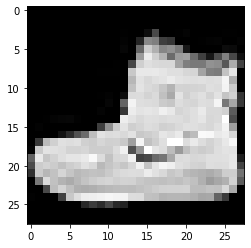

In [2]:
# load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# display
print(train_images.shape)
print(train_labels.shape)
index = 0
np.set_printoptions(linewidth=320)
print(train_images[index])
plt.imshow(train_images[index], cmap="gray")
plt.show()

train

In [3]:
# preprocess
train_images = train_images / 255.0
test_images = test_images / 255.0

# build model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# train model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

# evaluate model
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 1s 658us/step - loss: 0.5016 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 1s 663us/step - loss: 0.3798 - accuracy: 0.8628
Epoch 3/5
1875/1875 [==============================] - 1s 641us/step - loss: 0.3398 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 1s 645us/step - loss: 0.3164 - accuracy: 0.8842
Epoch 5/5
313/313 [==============================] - 0s 555us/step - loss: 0.3535 - accuracy: 0.8733


[0.353530615568161, 0.8733000159263611]

[8.4477463e-08 9.9999642e-01 1.0316967e-07 3.3510648e-06 4.1206518e-09 8.9759042e-12 8.3805102e-10 1.1369276e-13 1.9921741e-11 1.8354858e-12]
ans: 1, predict: 1


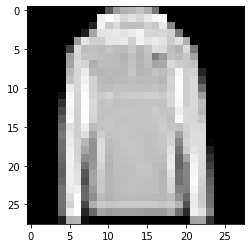

In [4]:
classifications = model.predict(test_images)
index = 24
plt.imshow(train_images[index], cmap="gray")
print(classifications[index])
print(f"ans: {test_labels[index]}, predict: {np.argmax(classifications[index])}")

NNの形状を変更するとどうなるか

In [5]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.compile(optimizer=tf.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=5)

model2.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4731 - accuracy: 0.8303
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3565 - accuracy: 0.8703
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3214 - accuracy: 0.8813
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2967 - accuracy: 0.8897
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8782


[0.33963489532470703, 0.8781999945640564]

In [6]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model3.compile(optimizer=tf.optimizers.Adam(),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model3.fit(train_images, train_labels, epochs=5)

model3.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4703 - accuracy: 0.8310
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3578 - accuracy: 0.8682
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3194 - accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8876
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8611


[0.3845771253108978, 0.8611000180244446]

epoch数を変更してみる

In [15]:
# このセルを再実行したときに前の学習を引き継ぐのを避けるため
from tensorflow.keras import backend as K
K.clear_session()

# このモデルの宣言を書かないとリセットされない
# 既に宣言されているからと、compileとfitだけにすると前の学習を引き継いでしまう
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=30)

model.evaluate(test_images, test_labels)

Epoch 1/30
1875/1875 [==============================] - 2s 717us/step - loss: 0.4980 - accuracy: 0.8243
Epoch 2/30
1875/1875 [==============================] - 1s 668us/step - loss: 0.3803 - accuracy: 0.8627
Epoch 3/30
1875/1875 [==============================] - 1s 682us/step - loss: 0.3391 - accuracy: 0.8759
Epoch 4/30
1875/1875 [==============================] - 1s 634us/step - loss: 0.3137 - accuracy: 0.8850
Epoch 5/30
1875/1875 [==============================] - 1s 661us/step - loss: 0.2923 - accuracy: 0.8920
Epoch 6/30
1875/1875 [==============================] - 1s 658us/step - loss: 0.2789 - accuracy: 0.8967
Epoch 7/30
1875/1875 [==============================] - 1s 693us/step - loss: 0.2667 - accuracy: 0.9019
Epoch 8/30
1875/1875 [==============================] - 1s 633us/step - loss: 0.2556 - accuracy: 0.9047
Epoch 9/30
1875/1875 [==============================] - 1s 652us/step - loss: 0.2482 - accuracy: 0.9077
Epoch 10/30
1875/1875 [==============================] - 1s 644u

[0.3861876428127289, 0.8924000263214111]

callback

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.9): # Experiment with changing this value
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=100, callbacks=[callbacks])

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4717 - accuracy: 0.8314
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3575 - accuracy: 0.8695
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3212 - accuracy: 0.8820
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2975 - accuracy: 0.8910
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2807 - accuracy: 0.8953
Epoch 6/100
1854/1875 [============================>.] - ETA: 0s - loss: 0.2665 - accuracy: 0.9016
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9017
